In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
north_in = pd.read_csv("../Brazil Data/north.csv")

# Investigate Data

In [3]:
north_in.head()

,index,Data,Hora,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),...,"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",region,state,station,station_code,latitude,longitude,height
0,0,2000-05-09,00:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
1,1,2000-05-09,01:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
2,2,2000-05-09,02:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
3,3,2000-05-09,03:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
4,4,2000-05-09,04:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25


In [4]:
north_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8392320 entries, 0 to 8392319
Data columns (total 27 columns):
 #   Column                                                 Dtype  
---  ------                                                 -----  
 0   index                                                  int64  
 1   Data                                                   object 
 2   Hora                                                   object 
 3   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       float64
 4   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  float64
 5   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        float64
 6   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       float64
 7   RADIACAO GLOBAL (Kj/m²)                                int64  
 8   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           float64
 9   TEMPERATURA DO PONTO DE ORVALHO (°C)                   float64
 10  TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)             float64
 11

# Clean Data

In [5]:
# Reset columns and get relevant info
north_an = north_in.drop(["index"],axis=1)
renamed_columns_en = ['date','hour','total_precipitation','pressao atmosferica ao nivel da estacao (mb)','atmospheric pressure max. in the previous hour (mb)','atmospheric pressure min. in the previous hour (mb)','radiation (kj/m2)','air temperature - dry bulb (°c)','dew point temperature (°c)','max_temperature','min_temperature','dew temperature max. in the previous hour (°c)','dew temperature min. in the previous hour (°c)','max_humidity','min_humidity','air relative humidity (%)','wind direction (° (gr))','wind rajada maxima (m/s)','wind_speed','region','state','station','station_id','latitude','longitude','height']
north_an.columns = renamed_columns_en
north_an.drop(['pressao atmosferica ao nivel da estacao (mb)','atmospheric pressure max. in the previous hour (mb)','atmospheric pressure min. in the previous hour (mb)','radiation (kj/m2)','air temperature - dry bulb (°c)','dew point temperature (°c)', 'dew temperature max. in the previous hour (°c)','dew temperature min. in the previous hour (°c)','air relative humidity (%)','wind direction (° (gr))','wind rajada maxima (m/s)','region', 'state', 'latitude', 'longitude', 'height'], inplace=True, axis=1)

In [6]:
# Deal with NA data,
# if just a small portion, then delete it
north_an = north_an[north_an['date'] >= '2020-01-01']
print(north_an.shape)
north_an = north_an.replace(to_replace= -9999,value=np.NaN)
north_an.dropna(inplace=True)
print(north_an.shape)

(1005984, 10)
(483320, 10)


In [7]:
# Get YEAR & MONTH column for further analysis
north_an.reset_index(drop=True, inplace=True)
north_an["year"] = [north_an["date"][i][:4] for i in range(len(north_an["date"]))]
north_an["month"] = [north_an["date"][i][5:7] for i in range(len(north_an["date"]))]
north_an.head()



,date,hour,total_precipitation,max_temperature,min_temperature,max_humidity,min_humidity,wind_speed,station,station_id,year,month
0,2020-01-01,00:00,0.0,27.9,26.8,81.0,71.0,0.0,LABREA,A111,2020,01
1,2020-01-01,01:00,0.0,26.8,26.5,83.0,81.0,0.0,LABREA,A111,2020,01
2,2020-01-01,02:00,0.0,26.8,26.0,88.0,82.0,0.9,LABREA,A111,2020,01
3,2020-01-01,03:00,0.0,26.0,25.6,91.0,88.0,0.1,LABREA,A111,2020,01
4,2020-01-01,04:00,0.0,25.7,25.6,92.0,91.0,0.0,LABREA,A111,2020,01


In [8]:
# What states are covered in North
north_an["state"].unique()

KeyError: 'state'

In [ ]:
# How many years it covers
print(north_an["date"].max(), north_an["date"].min())

2021-04-30 2000-05-09


In [ ]:
# How many stations it included
print(north_an["station_code"].unique())

['A101' 'A202' 'A201' 'A009' 'A010' 'A018' 'A213' 'A212' 'A021' 'A020'
 'A925' 'A019' 'A940' 'A102' 'A112' 'A939' 'A938' 'A230' 'A231' 'A124'
 'A236' 'A128' 'A214' 'A119' 'A209' 'A227' 'A210' 'A117' 'A235' 'A113'
 'A215' 'A233' 'A110' 'A226' 'A126' 'A229' 'A122' 'A211' 'A039' 'A125'
 'A120' 'A242' 'A123' 'A121' 'A104' 'A241' 'A038' 'A111' 'A234' 'A140'
 'A136' 'A138' 'A137' 'A240' 'A044' 'A135' 'A134' 'A246' 'A248' 'A232'
 'A239' 'A040' 'A043' 'A109' 'A041' 'A249' 'A133' 'A250' 'A054' 'A108'
 'A052' 'A049' 'A216' 'A053' 'A048' 'A050' 'A055' 'A051' 'A247' 'A228'
 'A251' 'A253' 'A252' 'A144' 'A244' 'A254' 'A256']


# Try to get 10,000 rows

Data context proposed: weather info in year 2020 across 12 months at midday for 27 stations in North region of Brazil

In [9]:
north_selected = north_an.loc[(north_an["year"] == "2020") & (north_an["hour"] == "12:00" )]

In [ ]:
# north_selected["station_code"].unique()

array(['A111', 'A134', 'A051', 'A216', 'A247', 'A113', 'A119', 'A939',
       'A055', 'A018', 'A215', 'A240', 'A123', 'A104', 'A050', 'A202',
       'A250', 'A101', 'A102', 'A233', 'A235', 'A044', 'A048', 'A234',
       'A228', 'A009', 'A109', 'A249', 'A138', 'A038', 'A214', 'A209',
       'A110', 'A226', 'A021', 'A117', 'A241', 'A253', 'A940', 'A120',
       'A135', 'A019', 'A108', 'A246', 'A938', 'A239', 'A053', 'A231',
       'A252', 'A043', 'A010', 'A121', 'A112', 'A041', 'A248', 'A213',
       'A201', 'A236', 'A136', 'A052', 'A039', 'A040', 'A054', 'A229',
       'A125', 'A212', 'A232', 'A122', 'A126', 'A020', 'A049', 'A244',
       'A227', 'A140', 'A124'], dtype=object)

In [10]:
# select stations
chosen_station = ['A111', 'A134', 'A051', 'A216', 'A247', 'A113', 'A119', 'A939',
       'A055', 'A018', 'A215', 'A240', 'A123', 'A104', 'A050', 'A202',
       'A250', 'A101', 'A102', 'A233', 'A235', 'A044', 'A048', 'A234']

In [12]:
north_selected_final = north_selected[north_selected["station_id"].isin(chosen_station)]

In [ ]:
# final context
# print(north_selected_final.shape)
# print(north_selected_final["year"].unique())
# print(north_selected_final["month"].unique())
# cols = north_selected_final.columns.to_list()
# print(cols)

['date', 'hour', 'total_precipitation', 'max_temperature', 'min_temperature', 'max_humidity', 'min_humidity', 'wind_speed', 'station', 'station_code', 'year', 'month']


In [13]:
cols = ['station_id','date', 'hour', 'total_precipitation', 'max_temperature', 'min_temperature', 'max_humidity', 'min_humidity', 'wind_speed', 'station', 'year', 'month']

north_selected_final = north_selected_final[cols]

In [14]:

north_selected_final.reset_index(drop=True, inplace=True)
north_selected_final.head()

,station_id,date,hour,total_precipitation,max_temperature,min_temperature,max_humidity,min_humidity,wind_speed,station,year,month
0,A111,2020-01-01,12:00,1.6,24.0,23.7,94.0,94.0,0.0,LABREA,2020,01
1,A111,2020-01-02,12:00,0.0,25.9,23.2,94.0,82.0,0.7,LABREA,2020,01
2,A111,2020-01-03,12:00,0.2,24.9,23.6,94.0,90.0,0.4,LABREA,2020,01
3,A111,2020-01-04,12:00,0.0,25.5,24.9,93.0,89.0,1.5,LABREA,2020,01
4,A111,2020-01-05,12:00,0.0,25.1,24.4,94.0,92.0,0.3,LABREA,2020,01


In [ ]:
from sqlalchemy import create_engine

engine = create_engine(f'sqlite:///<replace_this_with_path_to_db_file>')
north_selected_final.to_sql("north", con=engine, if_exists='append')

# Data Initial investigation

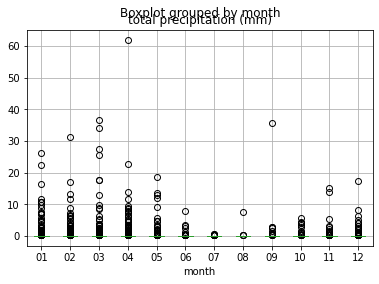

In [ ]:
north_selected_final.boxplot(column="total precipitation (mm)",by="month")
plt.show()

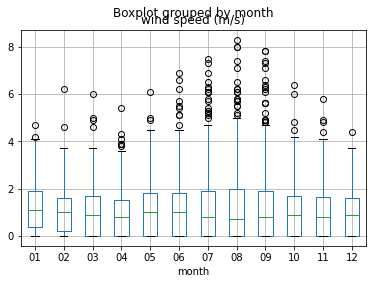

In [ ]:
north_selected_final.boxplot(column="wind speed (m/s)",by="month")
plt.show()

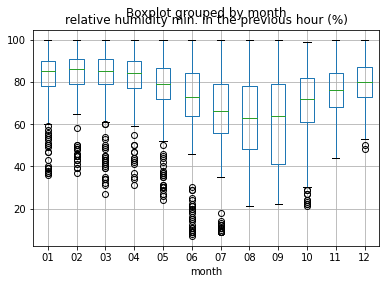

In [ ]:
north_selected_final.boxplot(column="relative humidity min. in the previous hour (%)",by="month")
plt.show()